https://iter01.com/575688.html
https://kknews.cc/zh-tw/code/k2geb4r.html


In [1]:
import pandas as pd
import numpy as np 
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# target_ToolGID = 'PK_DUVKrF'
# target_ToolGID = 'XE_Sorter'
# target_ToolGID = 'MA_Alps'
target_ToolGID = 'PW_PIX'
def readDataFromFile(file_path):
    df = pd.read_csv(file_path)
    return df

df_train=readDataFromFile('../../homework/training_data_20210302.csv')
df_train = df_train.loc[df_train['TOOLG_ID']==target_ToolGID]
# 觀察缺失值------------------------------------------
print(df_train.isnull().sum())
# 做数据切分------------------------------------------
print(df_train.drop(['TOOLG_ID','MOVE_QTY','MFG_DATE','AI'], axis=1).describe())
df_train_eh =df_train.drop(['TOOLG_ID','MOVE_QTY','MFG_DATE','AI'], axis=1) 
X_dropped = np.asarray(df_train_eh)
Y_dropped = np.asarray(df_train['MOVE_QTY'])

X_train, X_val, y_train, y_val = train_test_split(X_dropped, Y_dropped,test_size =0.2, random_state=1)
xgTrain = xgb.DMatrix(X_train,y_train)
xgVal = xgb.DMatrix(X_val,y_val)

#調超參 best_nround-----------------------------------------------------------
 
other_params = {'learning_rate': 0.1, 'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 1, 'seed': 0,
    'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}
model = xgb.XGBRegressor(**other_params)
num_round = 10
best_nround = 1000

# bst = xgb.train(param, dtrain, num_round)
# 设定watchlist用于查看模型状态
watchlist  =[(xgTrain, 'train'), (xgVal, 'valid')]

res = xgb.cv(other_params,xgTrain, nfold=3,num_boost_round=500,metrics='rmse',early_stopping_rounds=25)
# #找到最佳迭代轮数
best_nround = res.shape[0] - 1
print('找到最佳迭代轮数',best_nround)
bst = xgb.train(other_params, xgTrain, best_nround, watchlist)



MFG_DATE       0
TOOLG_ID       0
WIP_QTY        0
NO_HOLD_QTY    0
MOVE_QTY       0
M              0
U              0
PT             0
UP_TIME        0
EQP_UTIL       0
TC             0
CS             0
AI             0
C_AI           0
dtype: int64
          WIP_QTY  NO_HOLD_QTY           M           U           PT  \
count  401.000000   401.000000  401.000000  401.000000   401.000000   
mean   161.995012   134.887781    2.987531    0.506376  3085.053994   
std    136.443175   135.970897    0.149480    0.091484   284.679610   
min      1.000000     0.000000    1.000000    0.333333  2402.283019   
25%     76.000000    50.000000    3.000000    0.462222  2886.127273   
50%    125.000000   100.000000    3.000000    0.500000  3086.842857   
75%    200.000000   174.000000    3.000000    0.546512  3254.179104   
max    913.000000   895.000000    3.000000    1.700000  4347.333333   

          UP_TIME    EQP_UTIL          TC          CS        C_AI  
count  401.000000  401.000000  401.000000

In [2]:
df_train

,MFG_DATE,TOOLG_ID,WIP_QTY,NO_HOLD_QTY,MOVE_QTY,M,U,PT,UP_TIME,EQP_UTIL,TC,CS,AI,C_AI
152,20200122,PW_PIX,108.0,100.0,1580.0,3.0,0.587963,3232.708333,1.000000,0.656590,0.433313,0.365686,68.958333,0.752956
450,20200123,PW_PIX,59.0,50.0,1839.0,3.0,0.537037,3227.466667,0.943611,0.694146,0.387840,0.337132,73.541667,0.898059
628,20200124,PW_PIX,108.0,100.0,1568.0,3.0,0.497653,3389.704225,0.962111,0.635283,0.366415,0.336746,69.458333,0.964658
1145,20200125,PW_PIX,258.0,250.0,2541.0,3.0,0.569892,3153.588710,0.961270,0.949337,0.364306,0.314092,110.041667,0.634169
1247,20200126,PW_PIX,258.0,225.0,2332.0,3.0,0.557756,3482.871287,1.000000,0.827492,0.282878,0.252590,98.166667,0.677258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118771,20210221,PW_PIX,110.0,83.0,2296.0,3.0,0.438095,3067.057143,1.000000,0.770908,0.394342,0.298569,92.875000,0.573925
118886,20210222,PW_PIX,75.0,50.0,2031.0,3.0,0.501754,2916.189474,0.911183,0.754109,0.312661,0.258611,84.291667,0.589925
119128,20210223,PW_PIX,205.0,180.0,2291.0,3.0,0.511111,3263.752381,0.978084,0.810124,0.410462,0.324960,99.833333,0.604011
119512,20210224,PW_PIX,75.0,50.0,1777.0,3.0,0.541667,3214.662500,0.902400,0.762454,0.305057,0.263326,71.750000,0.768001


In [3]:
import datetime

df_train[df_train['MFG_DATE'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))>pd.to_datetime('2020-11-01')]

df_train_filter28days =df_train[
    df_train['MFG_DATE'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))>
    
     df_train['MFG_DATE'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d')).max()- datetime.timedelta(days=28) ]
df_train_filter28days.to_csv('./df_train_filter28days.csv')  


In [4]:
df_testing = df_train_filter28days.drop(['TOOLG_ID','MOVE_QTY','MFG_DATE','AI'], axis=1)

 

In [5]:
# df_train_filter28days = readDataFromFile('./df_train_filter28days.csv')
# df_train_filter28days

In [10]:

cols=['M','U','PT','UP_TIME','EQP_UTIL','TC','CS','C_AI']
#df_testing = df_train_filter28days.drop(['TOOLG_ID','MOVE_QTY','MFG_DATE','AI'], axis=1)



df_testing = df_train.drop(['TOOLG_ID','MOVE_QTY','MFG_DATE','AI'], axis=1)
df_testing[cols]= df_testing[cols].mean()
# for col in df_testing.columns:
#     if col =='UP_TIME':
#         df_testing[col] = df_testing[df_testing['UP_TIME'].apply(lambda x: x>=0.96)]['UP_TIME'].mean() 
#     elif col =='M':
#         df_testing[col] = df_testing[df_testing[col].apply(lambda x: x>=31)][col].mean() 
#     elif col =='U':
#         df_testing[col] = df_testing[df_testing[col].apply(lambda x:  0.06 <=  x <=0.08)][col].mean()         
#     else:
#         df_testing[col]= df_testing[col].mean()
df_testing =df_testing[0:1]
print(df_testing.head())
# max_wip = df_testing['NO_HOLD_QTY'].max()* .75
max_wip = np.percentile(df_testing['NO_HOLD_QTY'], 50) # return 50th percentile, e.g median.
tick = (df_testing['NO_HOLD_QTY'].max() - df_testing['NO_HOLD_QTY'].min()) /400
if max_wip <=0 :
    max_wip=100
if tick <1 :
    tick = 1
print(max_wip,tick)

df = pd.DataFrame(columns = df_testing.columns)

for i in range(1000):
    df_testing['NO_HOLD_QTY']=max_wip+ tick*i
    df = df.append(df_testing,ignore_index=True)
# print(df.head())        


     WIP_QTY  NO_HOLD_QTY         M         U           PT   UP_TIME  \
152    108.0        100.0  2.987531  0.506376  3085.053994  0.939801   

     EQP_UTIL        TC        CS      C_AI  
152  0.692417  0.387052  0.334995  0.300796  
100.0 1


In [7]:
tick

1

In [8]:
df

,WIP_QTY,NO_HOLD_QTY,M,U,PT,UP_TIME,EQP_UTIL,TC,CS,C_AI
0,108.0,100.0,2.987531,0.506376,3085.053994,0.939801,0.692417,0.387052,0.334995,0.300796
1,108.0,101.0,2.987531,0.506376,3085.053994,0.939801,0.692417,0.387052,0.334995,0.300796
2,108.0,102.0,2.987531,0.506376,3085.053994,0.939801,0.692417,0.387052,0.334995,0.300796
3,108.0,103.0,2.987531,0.506376,3085.053994,0.939801,0.692417,0.387052,0.334995,0.300796
4,108.0,104.0,2.987531,0.506376,3085.053994,0.939801,0.692417,0.387052,0.334995,0.300796
...,...,...,...,...,...,...,...,...,...,...
2995,108.0,3095.0,2.987531,0.506376,3085.053994,0.939801,0.692417,0.387052,0.334995,0.300796
2996,108.0,3096.0,2.987531,0.506376,3085.053994,0.939801,0.692417,0.387052,0.334995,0.300796
2997,108.0,3097.0,2.987531,0.506376,3085.053994,0.939801,0.692417,0.387052,0.334995,0.300796
2998,108.0,3098.0,2.987531,0.506376,3085.053994,0.939801,0.692417,0.387052,0.334995,0.300796


ipykernel_launcher:11: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "width" which is no longer supported as of 3.3 and will become an error two minor releases later
ipykernel_launcher:11: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "height" which is no longer supported as of 3.3 and will become an error two minor releases later


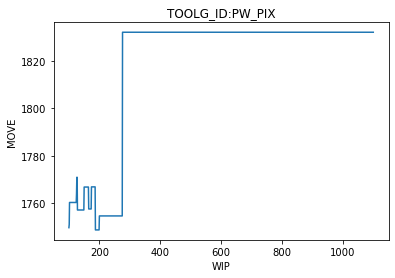

In [11]:
X_droppedtest = np.asarray(df)
xgtest = xgb.DMatrix(X_droppedtest)
y_predict = bst.predict(xgtest)
df['predict'] = y_predict

plt.plot(df['NO_HOLD_QTY'] , y_predict)
plt.title('TOOLG_ID:'+ df_train['TOOLG_ID'].iloc[0])
plt.xlabel("WIP")
plt.ylabel("MOVE")
 
plt.savefig('./'+df_train['TOOLG_ID'].iloc[0]+'2.pdf',width=600, height=350)#儲存檔案
plt.show()